字本評估方法:<br>
Term Frequency(tf)<br>
Inverse document frequency(itf)<br>
tf-idf(t, d, D) = tf(t, d) * idf(t, D)

Term frequency (字頻）is the relative frequency of term t within
document d<p>
$tf(t, d) = \frac{f_{t, d}}{\sum_{t' \in d}f_{ti, d}}$<p>

$idf(t, d) = log\frac{N}{\vert \{d \in D: t \in d\}\vert}$<p>

N: total number of documents in the corpus $N = \vert D \vert$<br>
$\vert \{ d \in D: t \in d\}\vert$: number of documents where the term t appears<br>
<hr>

BM = Best Matching<br>
Okapi BM25<p>
Given a query Q, containing keywords q1, · · · , qn, the BM25 score of
document D is:<p>
$$score(D, Q) = \sum_{i = 1}^{n} IDF(q_i) * \frac{f(q_i, D) * (k_1 + 1)}{f(q_i, D) + k_1 * (1 - b + b * \frac{\vert D \vert}  {avgdl})}$$<p>
where $f(q_i, D)$ is $q_i$'s term frequency, $\vert D \vert$ is the length of document D in word, avgdl is the average document length in the text collection from which document are drown. $k_1$ and $b$ are free parameters, usually chosen, in absence of an advanced optimization

$$IDF(q_i) = ln(\frac{N - n(q_i) + 0.5}{n(q_i + 0.5} + 1)$$<p>
is the IDF weight of the query term $q_i$, where N is the total number of documents in the collection and $n(q_i)$ is the number of documents containing $q_i$.<br>
<hr>



網頁重要性: visit counts 流量<p>

visit a page: follow links randomly<p>

PageRank(PR)(google used):<p>
simple ranking:<br>
$$ R(u) = c\sum_{v \rightarrow u}\frac{R(v)}{d_v}$$<p>

$d_v$ is the degree of v<p>
以向量方式表示: 令A為web page 的 Stochatic adjacency matrix
$$ A_{uv} = \begin{cases}
           \frac{1}{d_v} & \mbox{there is a link from v to u}\\
           0 & \mbox{if not}          
           \end{cases}.$$

if R is the vector of page rank, then $R = cAR$

Large Web-Size Grapgs

Encounter problem:
* Large adjacency matrix $\rightarrow$ Find eigenvectors
* $R = \lambda AR \rightarrow R$ is a stable vextor 
* idea: random$R_0$, if $lim_{n \rightarrow \infty}A^nR_0 = r$ exists, then $Ar = r$.
* power iteration
    * Let $ R_0 = (\frac{1}{N}, \dots, \frac{1}{N})$
    * $R_{n + 1} = AR_n$
    * Stop when $\vert R_{n + 1} - R_n\vert_1 < \varepsilon$<p>
Page Rank: Problem
* Dead ends: Some pages have no out-links
* Spider traps: All out-links within the group<p>

solution:
* With probability $\beta$, follow a link
* With probability $1 − \beta$, jump to some random page $E$ (preference
vector)
    
$$ R(u) = \beta \sum_{v \rightarrow u}\frac{R(v)}{d_v} + (1 - \beta)E(u)$$
<hr>

HITS = Hyperlink-Induced Topic Search
依照超連結的結構分成hubs 和 authorities，q 是一個term-based search query，要在收集來的網頁裡對應 topic t
* Root set S: 在搜尋引擎上搜尋 q 會獲得的頁面（authorities 的候選）
* Base set $C = S \cup \{p \vert \exists p' \in S, p \rightarrow p'\} \cup \{p \vert \exists p'' \in S, p'' \rightarrow p'\}$
META-Algorithm
* Link structure on $C: G = \{(C, E)\}$
* $E = \{(p, p')| p \rightarrow p'\}$: a directed edgee （has a hyperlink from p to p’)
* $W \in R^{\vert c \vert \times \vert c \vert}$ adjacent matrix of G<p>
    
Kleinberg’s Mutual Reinforcement Approach
* Two distinct types of Web pages: hubs and authorities.
* a good hub will point to many authorities
* a good authority will be pointed at by many hubs
* $h(s)$: a hub weight of $s \in C$
* $a(s)$: a authority weight of $s \in C$
* $h(s) \propto \sum_{s \rightarrow p}a(p)$
* $a(s) \propto \sum_{p \rightarrow s}h(p)$
    
Kleinberg’s Algorithm (HITS)
* $a(s) \leftarrow 1, h(s) \leftarrow 1$
* $a(s) \leftarrow \sum_{p \rightarrow s}h(p) \Longleftrightarrow a\leftarrow W^Th$
* $h(s) \leftarrow \sum_{s \rightarrow p}a(p) \Longleftrightarrow h \leftarrow Wa$
* $a(s) \leftarrow \frac{a(s)}{\sum_sa(s)} \Longleftrightarrow a \leftarrow \frac{a}{\sum_ia_i}$
* $h(s) \leftarrow \frac{h(s)}{\sum_sh(s)} \Longleftrightarrow h \leftarrow \frac{h}{\sum_ih_i}$
* until converges
    
* a 是 normalized $W^TW$ 的 principal eigenvector
* h 是 normalized $WW^T$ 的 principal eigenvector
<hr>

META-ALGORITHM for link-structure nanlysis

判斷hubs 與 authorities page 方法:
$H = WW^T$，$A = W^TW$ 
* 給定主題t，construct $C = \{t_{hubs, t_{auths}}$，$n = \vert C \vert$
* Construct hub matrix $H$ and authirities matrix $A$，將$M$: 只有一個正eigenvalue $\lambda(M)$ with h multiplicity 1，且$\lambda(M) > \vert \lambda' \vert$: $\lambda'$ any other eigenvalue.<br>
$V_{\lambda(M)}$: unit eigenvector(principal eigenvector)
* $k < n$: 像對於 $V_{\lambda(M)}$ 向量的 component 最大值的座標數：這形成 $C$裡的 principal algebraic community authorities (for $M = A$) or hubs
(for $M = H$)
<hr>

SALSA = Stochastic Approach for Link-Structure Analysis<br>
SALSA: SALSA can be seen as an improvement of HITS.The approach is based upon the theory of Markov chains and relies on the stochastic properties of random walks performed on our collection of pages.<p>

Definition of SALSA:
* A bipartite undirected graph $\tilde{G} = (V_h, V_a, E)$
* $V_h = \{s \in C \vert out-degree(s) > 0\}$: the hub side of $\tilde{G}$
* $V_a = \{s \in C \vert in-degree(s) > 0\}$: the authorities side of $\tilde{G}$
* $E = \{(s_h, r_a)\vert s \rightarrow r\}$

SALSA in matrix form
* Let $W$ be adjacency matrix of the directed graph defined by its link
structure.
* Let $W_r = W$ / row sum,  $W_c = W$ / column sum
* The Hub matrix $\tilde{H} = W_rW_c^T$
* The Authority matrix $\tilde{A} = W_c^TW_r$
* $\tilde{H}$ and $\tilde{A}$ are primitive and irreducible 

SALSA 與 HITS 的比較
* SALSA 的算法由於不是跑整個 graph，所以運算量較低
* HITS 只考慮往前連結，但 SALSA 有將返回的現象加入機制
* SALSA 只考慮相鄰網頁對自身的影響，HITS 考慮所收集到的網頁
對自身的影響



<hr>
 
Related Pins at Pinterest<p>
模型流程
* Candidate Generation
* Ranking
* Memboost

Pin-Board Graph
* G = (P, B, E)
* P = {p: pins}
* B = {b: boards}
* E = {e: link between pins and boards}
    
進階 random walk
Multiple query pins with weights<p>
考慮多個 query‧有一個 query set $Q = {(q,wq)}$ 有多個 pin，推薦 pin 若跟較多個 query 有關係，它的重要性應該比較高，分別計
算每個 query $q \in Q$ 的 counter $V_q[p]$，因為 degree 較高的 q，被很多 board加，需要較長的 step 才走得出來‧所以，對每個 query 有不同 random
walk 的長度有不同的 scaling factor:<br>
    $s_q = \vert E(q) \vert(C - log\vert E(q) \vert)$<P>
where $ C = max_{p \in P}\vert E(p)\vert$ maximal pin degree‧每個 random walk starting from pin q 的長度：<p>
    $N_q = w_qN\frac{s_q}{\sum_{r \in Q}S_r}$
Multi-hit Booster<p>
推薦 pin 若跟較多個 query 有關係，它的重要性應該比較高，計算
與所有 query set 的互動加權分數<br>
    $V[p] = (\sum_{q \in Q}\sqrt{V_q[p]})^2$<p>
Early Stopping<p>
是否要對每個 query pin 都維持 random walk $N_q$ 的長度，若 walk
的至少有 $n_p$ 個 candidate pins，每個至少拜訪 $n_v$ 次，就先結束此
random walk<p>
session Co-occurrence: Pin2Vec<p>
<hr>   
    
BackPropagation-Supervised learning<p>
    
 
Data set $D = \{(x1, y1), \dots, (x_N, y_N)\}, \widehat{y} = f(z)$<br>

Loss function(MSE):<br>
$ L = \frac{1}{N}\sum_{i = 1}^N\vert \hat{y}_i - y_i\vert^2$
    
    
Learning 的目標是求 L 的極小值
參數更新的方式：<p>
$w_i(t + 1) = w_i(t) - \lambda \frac{\partial L}{\partial w_i}(w(t))$<br>
$\lambda$: learning rate
<hr>
    
Supervise Learning 監督式學習<p>
* Labels
* Models (萃取特徵＋ Classifying layer）
* Objective functions

    
Machine Learning
* Supervised Learning 監督式學習 (ground truth labels+objective
function)
* Self-supervised Learning 自監督式學習（標籤是與生俱來）
* Semi-supervised Learning 半監督式學習（帶少量標籤、部分標籤）
* Unsupervised Learning 無監督式學習（不帶標籤）K-means,
auto-encode   
<hr>
pinSage:
* 將鄰居的鄰居向量經 affine transformation$\rightarrow$ReLU$\rightarrow$aggregation
(importance pooling) $\rightarrow$ 鄰居向量
* concatenate 自己與鄰居的向量$\rightarrow$affine transformation$\rightarrow$ReLU $\rightarrow$ 自
己的向量
* normalized 成自己新的embedding
Loss function: triplet loss
    
<hr>

Laplacian<p>

<hr>
LSTM 1997
W2W 2013
Glove, Seq2Seq 2014
transformation attentioon 2017
ELMO 2018
BERT, GPT 2019


### Homework 1
自行設定一個 query，在搜尋引擎上搜尋，取前三篇文章（不包括廣
告）‧計算 3 documents 中，tf-idf 分數最高的 top-5，獲取“關鍵字”
The problems that you may encounter:
* 如何存資料、在那裡做計算、如何產生 output
* 斷字: Jieba (pip install jieba) jieba.cut
* (key, value)

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [ ]:
options = Options()
options.add_argument("--disable-notifications")
driver = webdriver.Chrome('chromedriver', chrome_options=options) 
query = '羽球'
driver.get('https://www.google.com')
keyword = driver.find_element(By.CSS_SELECTOR, '.gLFyf')
keyword.send_keys("羽球")
keyword.send_keys(Keys.ENTER)

In [ ]:
a = driver.find_elements(By.CLASS_NAME, 'mCBkyc')
x = 0
for i in a[0:3]:
    i.click()
    if x == 0:
        b = driver.find_elements(By.XPATH, '//div/p[position() < 7]')
    elif x == 1:
        b = driver.find_elements(By.XPATH, '//p[position() > 1 and position() < 8]')
    elif x == 2:
        b = driver.find_elements(By.XPATH, '//p')
    with open('人工智慧作業(一).txt', 'a', encoding='UTF-8') as f:
        y = 0
        for j in b:
            y += 1
            if y == 7:
                break
            f.write(j.text)
            f.write('\n')
            
    x += 1
    driver.back()
    time.sleep(0.5)
driver.close()

In [14]:
x = []
with open('人工智慧作業(一).txt', 'r', encoding='UTF-8') as f:
    for line in f.readlines():
        x.append(line.strip())
x

['體育中心／陳冠宇報導',
 '球迷久等了！台灣羽球一姐戴資穎結束9月初的日本公開賽後，下一次比賽要等到10月18日開打的超級750系列丹麥公開賽，世界羽聯BWF日前也公布籤表，榮膺第2種子的戴資穎，首輪將碰上泰國世界排名12的選手布沙南（Busanan Ongbamrungphan），有望在八強賽碰上好友依瑟儂（Ratchanok Intanon），上演經典對決！',
 'BWF日前公布丹麥公開賽籤表，女單世界前10除了印度辛度、南韓安洗瑩沒有參加外，全部都投入這場比賽，其中台灣球迷最關注的戴資穎被分到籤表下半部，首場比賽將碰上泰國布沙南，有望在8強碰上老對手依瑟儂，上演兩人第33次對決，順利過關後，則可能碰上中國陳雨菲或泰國蓬帕威（Pornpawee Chochuwong）。',
 '',
 '據了解，小戴過去曾在2018、2019年完成丹麥公開賽二連霸，今年若也順利拿下冠軍，將成為史上第七位在丹麥賽拿下至少3冠的女單選手，好表現值得球迷期待！除了小戴外，世界排名第33的「交大學霸」許玟琪也將出戰丹麥賽，將在首輪碰上泰國世界排名第17好手猜萬（Lalinrat Chaiwan），「小小白」白馭珀則將在首輪碰上地主好手克里絲多福森（Line Christophersen）。',
 '最後在男單部分，近況火熱的台灣一哥周天成榮膺大會第五種子，將在首輪碰上泰國選手王高倫，世界排名第14的王子維則將在首輪碰上馬來西亞劉國倫，恰巧被分在同一區的兩人若都贏球，將在16強上演「台灣內戰」，也是球迷不能錯過的精采對決。',
 '〔體育中心／綜合報導〕世界羽聯（BWF）今天將更新世界排名，「戴博士」戴資穎的世界排名積分未被扣，仍高居女單第2，而東奧男雙金牌組合李洋／王齊麟升至世界第2，寶島一哥周天成躍居世界第4。',
 '戴資穎本週積分維持109045分，高居女單世界第2，落後世界球后山口茜2968分，中國一姐陳雨菲因為積分的「校正回歸」，2019福州公開賽和香港公開賽的冠軍積分都被扣除，積分降至102006分，下跌至第4名，南韓安洗瑩也因此上升至第3名，5至10名依序為西班牙瑪琳、印度辛度、泰國依瑟儂、日本奧原希望、泰國李美妙和中國何冰嬌。',
 '請繼續往下閱讀...',
 '',
 '男單方面，世界球王安賽龍依舊以122606分獨占鰲頭，而近期表現不佳的桃田賢斗，因為痛失

In [15]:
x = [i.strip() for i in x if i.strip() != '']

In [16]:
import jieba
import jieba.analyse

In [17]:
jieba.set_dictionary(r'C:\Users\ian\anaconda3\Lib\site-packages\jieba\dict.txt.big.txt')
jieba.load_userdict(r'C:\Users\ian\anaconda3\Lib\site-packages\jieba\jie.txt')

Building prefix dict from C:\Users\ian\anaconda3\Lib\site-packages\jieba\dict.txt.big.txt ...
Loading model from cache C:\Users\ian\AppData\Local\Temp\jieba.ua56f00cf5f06bf4205b2be2d5686baf0.cache
Loading model cost 0.751 seconds.
Prefix dict has been built successfully.


In [18]:
for i in x:
    words = jieba.cut(i, cut_all=False, use_paddle=True)
    print('/'.join(list(words)))

體育中心/／/陳冠宇/報導
球迷/久等/了/！/台灣/羽球/一姐/戴資穎/結束/9/月初/的/日本/公開賽/後/，/下/一次/比賽/要/等到/10/月/18/日/開打/的/超級/750/系列/丹麥/公開賽/，/世界羽聯/BWF/日前/也/公布/籤/表/，/榮膺/第/2/種子/的/戴資穎/，/首輪/將/碰上/泰國/世界排名/12/的/選手/布沙南/（/Busanan/ /Ongbamrungphan/）/，/有望/在/八強賽/碰上/好友/依瑟儂/（/Ratchanok/ /Intanon/）/，/上演/經典/對決/！
BWF/日前/公布/丹麥/公開賽/籤/表/，/女單/世界/前/10/除了/印度/辛度/、/南韓/安洗瑩/沒有/參加/外/，/全部/都/投入/這場/比賽/，/其中/台灣/球迷/最/關注/的/戴資穎/被/分到/籤/表下/半部/，/首場/比賽/將/碰上/泰國/布沙南/，/有望/在/8/強/碰上/老/對手/依瑟儂/，/上演/兩人/第/33/次/對決/，/順利/過關/後/，/則/可能/碰上/中國/陳雨菲/或/泰國/蓬帕威/（/Pornpawee/ /Chochuwong/）/。
據/了解/，/小/戴過去/曾/在/2018/、/2019/年/完成/丹麥/公開賽/二連/霸/，/今年/若/也/順利/拿下/冠軍/，/將成/為史/上/第七位/在/丹麥/賽/拿下/至少/3/冠/的/女單/選手/，/好/表現/值得/球迷/期待/！/除了/小戴外/，/世界/排名第/33/的/「/交/大學/霸/」/許玟/琪/也將/出戰/丹麥/賽/，/將在/首輪/碰上/泰國/世界/排名第/17/好手/猜萬/（/Lalinrat/ /Chaiwan/）/，/「/小小白/」/白馭珀/則將/在/首輪/碰上/地主/好手/克里絲多福森/（/Line/ /Christophersen/）/。
最後/在/男單/部分/，/近況/火熱/的/台灣/一哥/周天成/榮膺/大會/第五/種子/，/將在/首輪/碰上/泰國/選手/王高倫/，/世界/排名第/14/的/王子/維則將/在/首輪/碰上/馬來西亞/劉國倫/，/恰巧/被/分/在/同一/區的/兩人/若/都/贏球/，/將在/16/強/上演/「/台灣/內戰/」/，/也/是/球迷/不能/錯過/的/精采/對決/。
〔/體育中心/／/綜合/報導/〕/世界羽聯/（/BWF/）/今/天將/更新

In [20]:
x = ' '.join(x)

In [21]:
jieba.analyse.extract_tags(x, topK=5, withWeight=True)

[('泰國', 0.2573993003016746),
 ('積分', 0.2573993003016746),
 ('公開賽', 0.20019945579019138),
 ('戴資穎', 0.17159953353444976),
 ('丹麥', 0.17159953353444976)]

### Homework 2
自行畫一個 5 個 node 的有向圖（directed graph），計算此圖中的 page
rank 分數 Problems that you may encounter
* power iteration or solving by finding eigenvectors
* Is there a solution?
* Compute by hands or compute

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
nodes = ['a', 'b', 'c', 'd', 'e']
edges = [('a', 'b', 1/4), ('a', 'c', 1/4), ('a', 'd', 1/4), ('a', 'e', 1/4), ('b', 'c', 1/2), ('b', 'd', 1/2), ('c', 'a', 1/4), ('c', 'b', 1/4), ('c', 'd', 1/4), ('c', 'e', 1/4), ('e', 'c', 1/2), ('e', 'd', 1/2)]

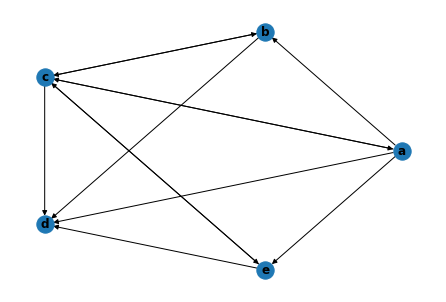

In [3]:
plt.figure()
g1 = nx.DiGraph()
g1.add_nodes_from(nodes)
g1.add_weighted_edges_from(edges)
nx.draw(g1, nx.circular_layout(g1), with_labels = True, font_weight = 'bold')

In [26]:
x = np.array([[0, 1/4, 1/4, 1/4, 1/4], [0, 0, 1/2, 1/2, 0], [1/4, 1/4, 0, 1/4, 1/4], [0, 0, 0, 0, 0], [0, 0, 1/2, 1/2, 0]])
c = np.linalg.eig(x)

In [27]:
c[0]

array([-0.3903882, -0.25     ,  0.6403882,  0.       ,  0.       ])

In [28]:
c[1]

array([[-4.35162146e-01, -7.07106781e-01,  5.57345410e-01,
         0.00000000e+00, -5.77350269e-01],
       [ 5.57345410e-01,  4.71404521e-01,  4.35162146e-01,
        -7.07106781e-01, -1.92296269e-16],
       [-4.35162146e-01, -2.35702260e-01,  5.57345410e-01,
         0.00000000e+00, -5.77350269e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.77350269e-01],
       [ 5.57345410e-01,  4.71404521e-01,  4.35162146e-01,
         7.07106781e-01, -2.24345647e-16]])

特徵值不為負所以只有0.6403882那筆


In [29]:
c[1][2,:]

array([-0.43516215, -0.23570226,  0.55734541,  0.        , -0.57735027])

### Homework3
使用作業二的圖，若 k = 1，在 HITS 算法中，誰是 authority？誰是
hub？
在 SALSA 算法中，誰是 authority？誰是 hub？

In [8]:
hubs, authorities = nx.hits(g1, max_iter = 50, normalized = True)#HITS

In [9]:
hubs #b, e

{'a': 0.20190311048201695,
 'b': 0.3349522944818139,
 'c': 0.12819230055435524,
 'd': 0.0,
 'e': 0.3349522944818139}

In [10]:
authorities #d

{'a': 0.03204807548813599,
 'b': 0.08252385326005092,
 'c': 0.3854280712518131,
 'd': 0.4174761467399491,
 'e': 0.08252385326005092}

In [12]:
w_r = x = np.array([[0, 1/4, 1/4, 1/4, 1/4], [0, 0, 1/2, 1/2, 0], [1/4, 1/4, 0, 1/4, 1/4], [0, 0, 1/2, 1/2, 0]])
w_ct = np.array([[0, 0, 1, 0], [1/2, 0, 1/2, 0], [1/3, 1/3, 0, 1/3], [1/4, 1/4, 1/4, 1/4], [1/2, 0, 1/2, 0]]) #SALSA

In [14]:
h = w_r.dot(w_ct)
a = w_ct.dot(w_r)

In [16]:
c_h = np.linalg.eig(h)

In [17]:
c_h[0]

array([ 1.00000000e+00,  9.28332553e-02,  4.48833411e-01, -1.62177477e-18])

In [18]:
c_h[1][0]# h a

array([-5.00000000e-01, -7.64315776e-01,  3.35146503e-02,  3.09245465e-16])

In [19]:
c_a = np.linalg.eig(a)

In [20]:
c_a[0]

array([ 1.00000000e+00,  4.48833411e-01,  9.28332553e-02,  2.18265616e-17,
       -2.21622393e-17])

In [21]:
c_a[1][0]#authority d

array([-0.4472136 , -0.689365  , -0.84571921,  0.28540422, -0.2880987 ])

# Homework 4

Given a simple neural network as following: Input data$\{ (x_1, y_1), (x_2, y_2)\}$, where $x_1 = (2, 0, 1)^T$, $y_1 = 1, x_2 = (0, 1, 0)^T, y_2 = 0$ The hidden layer is a 1-dimension space<br>
$$ z = h(x) = W^Tx + b$$
The output is 
$$\hat{y} = \sigma(h(x)),$$ where $\sigma(x) = \frac{1}{1 + e^{-x}}$ is the sigmoid fuction <br>
This network is supervised by minimizing the Cross-Entropy
$$ L = \frac{1}{2}\sum_{i = 1}^2 y_i log\hat{y}_i$$
Compute the first update of the weight $w^T = (w1,w2,w3)$ and b through
backpropagation with learning rate 1. Suppose the initial weights are
$w(0) = (0.5, 0.3, 0.2), b(0) = 1.$


In [19]:
from sympy import *
import numpy as np

In [4]:
var("y1 y2")

(y1, y2)

In [7]:
loss = 1/2 * log(y2) * y1

In [8]:
 diff(loss, y2)

0.5*y1/y2

In [12]:
var('z')

z

In [13]:
sig = 1/(1 + exp(z))

In [14]:
diff(sig)

-exp(z)/(exp(z) + 1)**2

In [15]:
var('x')

x

In [16]:
par = diff(loss, y2) * diff(sig) * x

In [17]:
par

-0.5*x*y1*exp(z)/(y2*(exp(z) + 1)**2)

In [39]:
z1 = np.array([[2, 0, 1], [0, 1, 0]])
w = np.array([0.5, 0.3, 0.2])

In [40]:
w.dot(z1.T) + 1

array([2.2, 1.3])

In [41]:
y3 = sig.evalf(subs = {'z': 2.2})
y4 = sig.evalf(subs = {'z': 1.3})

In [33]:
exp(-2.2)

0.110803158362334

In [42]:
par.evalf(subs = {'x':2, 'y1':1, 'y2': y3, 'z': 2.2})#w1

-0.900249510880315

In [43]:
par.evalf(subs = {'x':1, 'y1':0, 'y2': y4, 'z': 1.3})#w2

0

In [44]:
par.evalf(subs = {'x':1, 'y1':1, 'y2': y3, 'z': 2.2})#w3

-0.450124755440157

In [45]:
par.evalf(subs = {'x':1, 'y1':1, 'y2': y3, 'z': 2.2}) + par.evalf(subs = {'x':1, 'y1':0, 'y2': y4, 'z': 1.3}) #b

-0.450124755440157

In [46]:
0.5 - par.evalf(subs = {'x':2, 'y1':1, 'y2': y3, 'z': 2.2}) * 1 #w1(1)

1.40024951088031

In [47]:
0.3 - par.evalf(subs = {'x':1, 'y1':0, 'y2': y4, 'z': 1.3}) #w2(1)

0.300000000000000

In [48]:
0.2 - par.evalf(subs = {'x':1, 'y1':1, 'y2': y3, 'z': 2.2})#w3(1)

0.650124755440157

In [49]:
1 - (par.evalf(subs = {'x':1, 'y1':1, 'y2': y3, 'z': 2.2}) + par.evalf(subs = {'x':1, 'y1':0, 'y2': y4, 'z': 1.3}))#b(1)

1.45012475544016

### 神經元

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([[2, 0, 1], [0, 1, 0]])
y = np.array([1, 0])

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

In [6]:
model = Sequential()
model.add(Dense(1,
                input_dim=3,
                name='onleOneLayer',
                kernel_initializer=initializers.Constant(value=[.5, .3, .2]),
                bias_initializer='zeros'
                # kernel_initializer='zeros',
                # bias_initializer='ones'
                ))
model.add(Activation('sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 onleOneLayer (Dense)        (None, 1)                 4         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [13]:
def checkWeights(init = False):

    layer = model.get_layer('onleOneLayer')
    (w, b) = layer.get_weights()
    [w1] = w[0]
    [w2] = w[1]
    [w3] = w[2]
    print(f'\n       (w1, w2, w3, b) = {w1, w2, w3, b[0]}')
    if init:
        print('^^^^^^^^^^^^^^Init weights^^^^^^^^^^^^^^\n')
        


In [14]:
checkWeights(True)
model.fit(x, y, batch_size=2, epochs=1)
checkWeights()


       (w1, w2, w3, b) = (0.5, 0.3, 0.2, 0.0)
^^^^^^^^^^^^^^Init weights^^^^^^^^^^^^^^

1/1 [==============================] - 0s 264ms/step - loss: 0.0000e+00 - accuracy: 0.5000

       (w1, w2, w3, b) = (0.5, 0.29500002, 0.2, -0.005)


In [15]:
def runAgain(init = False):
    global model

    if init:

        model = Sequential()
        model.add(Dense(1,
                        input_dim=3,
                        name='onleOneLayer',
                        kernel_initializer=initializers.Constant(value=[.5, .3, .2]),
                        bias_initializer='zeros'
                        ))
        model.add(Activation('sigmoid'))
        checkWeights(init)
        model.compile(loss='categorical_crossentropy',
                      optimizer=tf.keras.optimizers.SGD(learning_rate=1),
                      metrics=['accuracy'])

    model.fit(x, y, epochs=1)
    checkWeights()

In [16]:
runAgain(True)


       (w1, w2, w3, b) = (0.5, 0.3, 0.2, 0.0)
^^^^^^^^^^^^^^Init weights^^^^^^^^^^^^^^

1/1 [==============================] - 0s 221ms/step - loss: 0.0000e+00 - accuracy: 0.5000

       (w1, w2, w3, b) = (0.5, -0.19999999, 0.2, -0.5)


In [17]:
from tensorflow.keras.datasets import imdb


In [18]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=7000)

17464789/17464789 [==============================] - 4s 0us/step


In [19]:
x_train.shape

(25000,)

In [20]:
len(x_train)

25000

In [21]:
len(x_test)

25000

In [22]:
n = 13579
i = n-1
x_n = x_train[i]
len(x_n)

371

In [23]:
x_n[:10]

[1, 230, 39, 3760, 4, 2, 1968, 1390, 535, 39]

In [24]:
x_n[-10:]

[12, 43, 115, 2, 752, 112, 35, 856, 2, 612]

In [25]:
for i in range(10):
    print(len(x_train[i]), end=', ')

218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 

In [26]:
y_train[i]

0

In [27]:
print(y_train[:10])

[1 0 0 1 0 0 1 0 1 0]


In [28]:
print(f'# of 1 in TRAIN data = {y_train.sum()}, # of 1 in TEST data = {sum(y_test)}')

# of 1 in TRAIN data = 12500, # of 1 in TEST data = 12500


In [29]:
word2int = imdb.get_word_index()
type(word2int)

1641221/1641221 [==============================] - 0s 0us/step


dict

In [30]:
word2int['sugercoma']

52369

In [31]:
x_n[:15]

[1, 230, 39, 3760, 4, 2, 1968, 1390, 535, 39, 6, 22, 15, 5519, 94]

In [32]:
int2Word = dict([(value,key) for (key,value) in word2int.items()])


In [33]:
int2Word[52369]

'sugercoma'

In [34]:
texts = []
for i in x_n:
    texts.append(int2Word[i])
print(" ".join(texts))

the anything or lou of and perspective smart stuff or is you for el make human film of its epic and br marry and and and has to best had ambiguous sequel never out is and popular 9 de what of on with is melodramatic br succeeded and at girl buy to and and film is again and and to keeping this is and and and that monsters of henry not let's that interesting of baby without lives that vs in at i i little 50 and it is emily like beautiful of impossible first about right previous to childhood each batman in of indian warrior feels and remind and for endearing about adult editing first is and somewhere trouble and fails captain are of adams br placed simply and this keeps it paintings this and to that find but good between lesser blood movie and and sort of fails miserable to picture taped wealthy for and to mainly movie is and better of and and said and agree of and strike he and who of complete death son to wouldn't br younger and front he five if out for from he his much ignored i i by b

In [35]:
def mapInt2Word(xi=[]):
    texts = []
    for i in xi:
        texts.append(int2Word[i])
    return " ".join(texts)

mapInt2Word(x_n)

"the anything or lou of and perspective smart stuff or is you for el make human film of its epic and br marry and and and has to best had ambiguous sequel never out is and popular 9 de what of on with is melodramatic br succeeded and at girl buy to and and film is again and and to keeping this is and and and that monsters of henry not let's that interesting of baby without lives that vs in at i i little 50 and it is emily like beautiful of impossible first about right previous to childhood each batman in of indian warrior feels and remind and for endearing about adult editing first is and somewhere trouble and fails captain are of adams br placed simply and this keeps it paintings this and to that find but good between lesser blood movie and and sort of fails miserable to picture taped wealthy for and to mainly movie is and better of and and said and agree of and strike he and who of complete death son to wouldn't br younger and front he five if out for from he his much ignored i i by 

In [36]:
from tensorflow.keras.preprocessing import sequence

In [37]:
max_len = 233
POST = 'post'
PRE = 'pre'

In [38]:
x_train_post = sequence.pad_sequences(x_train, 
                                     maxlen=max_len,
                                     padding = POST,
                                     value = 1.0)
x_train_pre = sequence.pad_sequences(x_train,
                                     maxlen=max_len,
                                     padding = PRE,
                                     value = 3.14)
x_train_def = sequence.pad_sequences(x_train)

In [39]:
x_train_post[i]

array([   1,   13,  359,    8,   30, 1202,   13,  296,    5,  358,   14,
        123,   88,   12,   16, 2742, 2403,  642,    5,    2, 1243,   50,
          9,    6,  176,    7,  486,   18,   32, 5181,   48,   25,   26,
         83,    4,  243,    7,  486,   15, 2033,   19,  231,  253,    7,
         84, 1454,   39,    2,   18,  463,   95,   25,   80,   28,    6,
         87,   58,   18,   12,   10,   10,   42,   48,   25,  358,   84,
         23, 1572, 3410, 1729,  170,   78,   25,   80,   82,   28,    6,
         87,   58,    5,   48,   25,  358,    2,  486,    5, 1572, 1186,
        449,   25,   80,  358,    4,  123,   10,   10,   13,  358,   32,
        289, 2572,    7,  486,   15, 1641,    2, 1580,   13,   40,    8,
         28,    6,  254,  462,   19,    4, 1186,    7,    4,  123,    2,
          9,   40,    6, 1135,   11,    4, 1547, 1079,    8,   14,   31,
         38,   48,   25,   26, 1458,    7,    4,  801,  298, 3002,    7,
          2,  202,   12,    6,  353,    8,  631, 15

In [40]:
len(x_train_post[i])

233

In [41]:
x_train_pre[i]

array([   3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
          3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
          3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
          3,    3,    3,    1,   13,  359,    8,   30, 1202,   13,  296,
          5,  358,   14,  123,   88,   12,   16, 2742, 2403,  642,    5,
          2, 1243,   50,    9,    6,  176,    7,  486,   18,   32, 5181,
         48,   25,   26,   83,    4,  243,    7,  486,   15, 2033,   19,
        231,  253,    7,   84, 1454,   39,    2,   18,  463,   95,   25,
         80,   28,    6,   87,   58,   18,   12,   10,   10,   42,   48,
         25,  358,   84,   23, 1572, 3410, 1729,  170,   78,   25,   80,
         82,   28,    6,   87,   58,    5,   48,   25,  358,    2,  486,
          5, 1572, 1186,  449,   25,   80,  358,    4,  123,   10,   10,
         13,  358,   32,  289, 2572,    7,  486,   15, 1641,    2, 1580,
         13,   40,    8,   28,    6,  254,  462,   

In [42]:
x_train_def[i]

array([  0,   0,   0, ...,   4,   2, 109])

In [43]:
x_train_def[i][:max_len]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
x_train = sequence.pad_sequences(x_train,
                                 maxlen=max_len,
                                 padding = POST)
x_test = sequence.pad_sequences(x_test, 
                                maxlen=max_len,
                                padding = POST)

In [45]:
x_train.shape

(25000, 233)

In [46]:
x_train[i]

array([   1,   13,  359,    8,   30, 1202,   13,  296,    5,  358,   14,
        123,   88,   12,   16, 2742, 2403,  642,    5,    2, 1243,   50,
          9,    6,  176,    7,  486,   18,   32, 5181,   48,   25,   26,
         83,    4,  243,    7,  486,   15, 2033,   19,  231,  253,    7,
         84, 1454,   39,    2,   18,  463,   95,   25,   80,   28,    6,
         87,   58,   18,   12,   10,   10,   42,   48,   25,  358,   84,
         23, 1572, 3410, 1729,  170,   78,   25,   80,   82,   28,    6,
         87,   58,    5,   48,   25,  358,    2,  486,    5, 1572, 1186,
        449,   25,   80,  358,    4,  123,   10,   10,   13,  358,   32,
        289, 2572,    7,  486,   15, 1641,    2, 1580,   13,   40,    8,
         28,    6,  254,  462,   19,    4, 1186,    7,    4,  123,    2,
          9,   40,    6, 1135,   11,    4, 1547, 1079,    8,   14,   31,
         38,   48,   25,   26, 1458,    7,    4,  801,  298, 3002,    7,
          2,  202,   12,    6,  353,    8,  631, 15

In [49]:
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(Embedding(7000, 128))
model.add(LSTM(150))
model.add(Dense(1, activation='sigmoid'))

In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         896000    
                                                                 
 lstm (LSTM)                 (None, 150)               167400    
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 1,063,551
Trainable params: 1,063,551
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [52]:
model.fit(x_train, y_train,
         batch_size=32,
         epochs=5)

Epoch 1/5
782/782 [==============================] - 154s 195ms/step - loss: 0.6553 - accuracy: 0.5753
Epoch 2/5
782/782 [==============================] - 151s 193ms/step - loss: 0.5391 - accuracy: 0.7202
Epoch 3/5
782/782 [==============================] - 154s 197ms/step - loss: 0.5532 - accuracy: 0.6986
Epoch 4/5
782/782 [==============================] - 148s 189ms/step - loss: 0.4315 - accuracy: 0.8153
Epoch 5/5
782/782 [==============================] - 147s 188ms/step - loss: 0.2798 - accuracy: 0.8923


In [53]:
score = model.evaluate(x_test, y_test)

782/782 [==============================] - 44s 56ms/step - loss: 0.3219 - accuracy: 0.8730


In [54]:
print('測試資料的 loss', score[0])
print('測試資料的正確率', score[1])

測試資料的 loss 0.3219415247440338
測試資料的正確率 0.8729599714279175


In [55]:
model.predict(np.array([x_n]))

1/1 [==============================] - 1s 683ms/step


array([[0.01789268]], dtype=float32)

In [56]:
y_train[i]

1

### HW5
Calculating the BLEU score<p>
Reference: The NASA Opportunity rover is battling a massive dust storm
on Mars.<br>
Candidate 1: The Opportunity rover is combating a big sandstorm on
Mars.<br>
Candidate 2: A NASA rover is fighting a massive storm on Mars.


In [57]:
ref_text = 'The NASA Opportunity rover is battling a massive dust storm on Mars.'
cand_text1 = 'The Opportunity rover is combating a big sandstorm on Mars.'
cand_text2 = 'A NASA rover is fighting a massive storm on Mars.'

In [59]:
def n_gram_v0(n=1, texts=''):
    texts = texts.replace('.', '')
    texts = texts.lower()

    words = texts.split(' ')

    n_split = []
    texts_len = len(words)

    if n > texts_len:
        return []

    for i in range(texts_len):
        if i+n > texts_len:
            break
        n_split.append(' '.join(words[i:i+n]))

    return n_split

n_gram_v0(n=1, texts = cand_text2)

['a', 'nasa', 'rover', 'is', 'fighting', 'a', 'massive', 'storm', 'on', 'mars']

In [60]:
def n_gram_v1(n=1, texts=''):
    texts = texts.replace('.', '')
    texts = texts.lower()

    words = texts.split(' ')

    n_split = []
    texts_len = len(words)

    if n > texts_len:
        return []

    for i in range(texts_len):
        if i+n > texts_len:
            break
        n_split.append(' '.join(words[i:i+n]))

    return set(n_split)

n_gram_v1(n=1, texts = cand_text2)

{'a', 'fighting', 'is', 'mars', 'massive', 'nasa', 'on', 'rover', 'storm'}

In [61]:
def n_gram_v2(n=1, texts='') -> dict:
    texts = texts.replace('.', '')
    texts = texts.lower()

    words = texts.split(' ')

    n_split = []
    texts_len = len(words)

    if n > texts_len:
        return []

    for i in range(texts_len):
        if i+n > texts_len:
            break
        n_split.append(' '.join(words[i:i+n]))

    n_gram_list = list(set(n_split))
    wrod_count = []
    for word in n_gram_list:
        wrod_count.append(n_split.count(word))


    return dict(zip(n_gram_list, wrod_count))

n_gram_v2(n=1, texts = cand_text2)

{'on': 1,
 'a': 2,
 'nasa': 1,
 'massive': 1,
 'storm': 1,
 'fighting': 1,
 'mars': 1,
 'is': 1,
 'rover': 1}

In [62]:
gramDict = n_gram_v2(n=1, texts = cand_text2)
gramDict.keys()

dict_keys(['on', 'a', 'nasa', 'massive', 'storm', 'fighting', 'mars', 'is', 'rover'])

In [63]:
gramDict.values()

dict_values([1, 2, 1, 1, 1, 1, 1, 1, 1])

In [66]:
refDic = n_gram_v2(1, ref_text)
rl = sum(refDic.values())
rl

12

In [67]:
candDic = n_gram_v2(1, cand_text1)
ol = sum(candDic.values())
ol

10

In [68]:
def BP(rl, ol):
    return min(1, np.exp(1-(rl/ol)))

BP(12, 10)

0.8187307530779819

In [69]:
bp1 = BP(rl, ol)
bp1

0.8187307530779819

In [70]:
def n_gram_v3(n=1, texts='') -> (dict, list):
    texts = texts.replace('.', '')
    texts = texts.lower()

    words = texts.split(' ')

    n_split = []
    texts_len = len(words)

    if n > texts_len:
        return []

    for i in range(texts_len):
        if i+n > texts_len:
            break
        n_split.append(' '.join(words[i:i+n]))

    n_gram_seq_list = []

    for n_gram in n_split:
        if n_gram not in n_gram_seq_list:
            n_gram_seq_list.append(n_gram)

    n_gram_count = []
    for n_gram in n_gram_seq_list:
        n_gram_count.append(n_split.count(n_gram))


    return dict(zip(n_gram_seq_list, n_gram_count)), n_gram_seq_list

n_gram_v3(n=1, texts = cand_text2)

({'a': 2,
  'nasa': 1,
  'rover': 1,
  'is': 1,
  'fighting': 1,
  'massive': 1,
  'storm': 1,
  'on': 1,
  'mars': 1},
 ['a', 'nasa', 'rover', 'is', 'fighting', 'massive', 'storm', 'on', 'mars'])

In [71]:
(refDic1, refWords1) = n_gram_v3(1, ref_text)

In [72]:
refDic1

{'the': 1,
 'nasa': 1,
 'opportunity': 1,
 'rover': 1,
 'is': 1,
 'battling': 1,
 'a': 1,
 'massive': 1,
 'dust': 1,
 'storm': 1,
 'on': 1,
 'mars': 1}

In [73]:
def printListOneRow(wordList=[]):
    for i in wordList:
        print(i, end = ', ')

In [74]:
printListOneRow(refWords1)

the, nasa, opportunity, rover, is, battling, a, massive, dust, storm, on, mars, 

In [75]:
(candDic1, candWords1) = n_gram_v3(1, cand_text1)

In [76]:
printListOneRow(candWords1)

the, opportunity, rover, is, combating, a, big, sandstorm, on, mars, 

In [77]:
def cal_mCand_and_min(refDic = dict(), candDic=dict(), refWords = [], candWords=[]) -> list:
    m_cand_list = []
    for n_gram in refWords:
        m_cand = 0
        if n_gram in candWords:
            m_cand = candDic[n_gram]

        m_cand_list.append(m_cand)

    min_list = []
    for ind, key in enumerate(refWords):
        min_list.append(min(m_cand_list[ind], refDic[key]))

    
    return list(zip(refWords, m_cand_list, min_list))

In [78]:
m1_info = cal_mCand_and_min(refDic1, candDic1, refWords1, candWords1)
print( f'n-gram, m_cand, min')
m1_info

n-gram, m_cand, min


[('the', 1, 1),
 ('nasa', 0, 0),
 ('opportunity', 1, 1),
 ('rover', 1, 1),
 ('is', 1, 1),
 ('battling', 0, 0),
 ('a', 1, 1),
 ('massive', 0, 0),
 ('dust', 0, 0),
 ('storm', 0, 0),
 ('on', 1, 1),
 ('mars', 1, 1)]

In [79]:
w_t1 = len(refWords1)
w_t1

12

In [80]:
sum = 0
for t in m1_info:
    sum += t[2]
p1 = sum/w_t1
p1

0.5833333333333334

In [81]:
def cal_pi(refWolds = [], m_info=[]) -> float:
    wt_i = len(refWolds)

    sum = 0
    for t in m_info:
        sum += t[2]
    pi = sum/wt_i
    return pi

p1 = cal_pi(refWords1, m1_info)
p1

0.5833333333333334

In [84]:
refDic2, refWords2 = n_gram_v3(2, ref_text)

In [85]:
candDic2 , candWords2 = n_gram_v3(2, cand_text1)

In [86]:
m2_info = cal_mCand_and_min(refDic2, candDic2, refWords2)

In [87]:
p2 = cal_pi(refWords2, m2_info)
p2

0.0

In [88]:
m2_info

[('the nasa', 0, 0),
 ('nasa opportunity', 0, 0),
 ('opportunity rover', 0, 0),
 ('rover is', 0, 0),
 ('is battling', 0, 0),
 ('battling a', 0, 0),
 ('a massive', 0, 0),
 ('massive dust', 0, 0),
 ('dust storm', 0, 0),
 ('storm on', 0, 0),
 ('on mars', 0, 0)]

In [89]:
def cal_pi_with(i=1, ref_text='', cand_text='')->float:
    refDic, refWords = n_gram_v3(n=i, texts=ref_text)
    candDic, candWords = n_gram_v3(n=i, texts=cand_text)
    m_info = cal_mCand_and_min(refDic, candDic, refWords)
    pi = cal_pi(refWords, m_info)
    return pi

cal_pi_with(i=1, ref_text=ref_text, cand_text=cand_text1)

0.0

In [91]:
def n_gram_v4(n=1, texts='') -> (dict, list):
    texts = texts.replace('.', '')
    texts = texts.lower()

    words = texts.split(' ')

    n_split = []
    texts_len = len(words)

    if n > texts_len:
        return []

    for i in range(texts_len):
        if i+n > texts_len:
            break
        n_split.append(' '.join(words[i:i+n]))

    n_gram_seq_list = []

    for n_gram in n_split:
        if n_gram not in n_gram_seq_list:
            n_gram_seq_list.append(n_gram)

    n_gram_count = []
    for n_gram in n_gram_seq_list:
        n_gram_count.append(n_split.count(n_gram))


    return dict(zip(n_gram_seq_list, n_gram_count)), n_gram_seq_list

n_gram_v3(n=1, texts = cand_text2)


({'a': 2,
  'nasa': 1,
  'rover': 1,
  'is': 1,
  'fighting': 1,
  'massive': 1,
  'storm': 1,
  'on': 1,
  'mars': 1},
 ['a', 'nasa', 'rover', 'is', 'fighting', 'massive', 'storm', 'on', 'mars'])